# Análise exploratória dos dados (Exploratory Data Analysis - EDA) - Má conduta sexual no ambiente acadêmico

A presente análise investiga o conjunto de dados públicos disponiblizado através do trabalho de coleta da rede `The Academic Sexual Misconduct Database` . A base de dados inclui casos públicos sobre má conduta sexual no ambiente universitário. 

Link dos dados exibidos: https://academic-sexual-misconduct-database.org/

# 1- Importando as bibliotecas

In [2]:
#Importando as bibliotecas:

import pandas as pd

import matplotlib.pyplot as plt

# 2- Carregando os dados


In [1]:
#Visão completa do nosso dataset
df_tabelaviolencia= pd.read_csv('violenciauniversidade.csv', sep=';', encoding='latin-1')
df_tabelaviolencia


KeyboardInterrupt



# 3 - Inspeção básica dos dados

In [12]:
#Filtrando informações específicas. No caso, quero saber quando vezes a universidade Berklee College of Music é citada no dataframe.
df_filtro = df_tabelaviolencia[(df_tabelaviolencia['Institution'] == 'Michigan State University')]
df_filtro.shape

(43, 13)

In [14]:
#Verificando algumas informações sobre o dataframe:
df_tabelaviolencia.info

<bound method DataFrame.info of      Incident Number    Status     Updated             Person  \
0      Incident 7204  Resolved  2022-03-03       Edward Jones   
1      Incident 7205  Resolved  2019-06-07        Leon Howard   
2      Incident 7206  Resolved  2019-06-07  LaVonette Bartley   
3      Incident 7207  Resolved  2019-06-07        John Knight   
4      Incident 7208  Resolved  2019-06-07   Philip Jemilohun   
...              ...       ...         ...                ...   
1254   Incident 9007  Resolved  2023-10-23       Howard Irvin   
1255   Incident 9008   Ongoing  2023-10-25                NaN   
1256   Incident 9009   Ongoing  2023-11-13                NaN   
1257   Incident 9010  Resolved  2023-11-15       NAME UNKNOWN   
1258   Incident 9012  Resolved  2023-11-15   Ivonne del Valle   

                           Institution           Role  \
0               Alabama A&M University        Faculty   
1             Alabama State University  Administrator   
2             Al

In [4]:
#Verificando os tipos de dados 
df_tabelaviolencia.dtypes

Incident Number         object
Status                  object
Updated                 object
Person                  object
Institution             object
Role                    object
Position                object
Discipline              object
Specific Discipline     object
Outcome                 object
Specific Outcome        object
Outcome Year           float64
Original Link(s)        object
dtype: object

# 4 - Limpeza dos dados

In [16]:
# Será que o dataframe possui dados duplicados? Vejamos:
df_tabelaviolencia.duplicated()

#O dataframe não apresentou nenhum valor duplicado

0       False
1       False
2       False
3       False
4       False
        ...  
1254    False
1255    False
1256    False
1257    False
1258    False
Length: 1259, dtype: bool

In [6]:
#Verificando o resumo estatístico dos dados:
df_tabelaviolencia.describe()

,Outcome Year
count,1170.000000
mean,2011.532479
std,10.121049
min,1917.000000
25%,2008.000000
50%,2016.000000
75%,2018.000000
max,2023.000000


In [7]:
#Verificando valores nulos no dataset:
print("Valores nulos por coluna do dataframe:")
print(df_tabelaviolencia.isnull().sum())

Valores nulos por coluna do dataframe:
Incident Number          0
Status                   0
Updated                  0
Person                 174
Institution              2
Role                   165
Position               230
Discipline             252
Specific Discipline    411
Outcome                166
Specific Outcome       112
Outcome Year            89
Original Link(s)        24
dtype: int64


# 5 - Explorando análises de dados específicos 

In [18]:
#Filtrando informações, nesse caso verifico quantas vezes o ano de 2022 foi mencionado:
df_filtroano= df_tabelaviolencia[df_tabelaviolencia['Updated'].str.contains('2019')]
df_filtroano.shape

(851, 13)

In [19]:
df_filtroano= df_tabelaviolencia[df_tabelaviolencia['Updated'].str.contains('2020')]
df_filtroano.shape

(135, 13)

In [20]:
df_filtroano= df_tabelaviolencia[df_tabelaviolencia['Updated'].str.contains('2021')]
df_filtroano.shape

(136, 13)

In [ ]:
df_filtroano= df_tabelaviolencia[df_tabelaviolencia['Updated'].str.contains('2021')]
df_filtroano.shape

In [21]:
#Criando uma função para verificar a data que teve mais menções:
ano = df_tabelaviolencia['Updated'].value_counts()
ano

Updated
2019-06-02    248
2019-05-31    151
2019-06-07    140
2019-05-28    106
2020-12-06     52
             ... 
2020-01-28      1
2020-01-24      1
2020-11-23      1
2020-01-18      1
2022-12-01      1
Name: count, Length: 208, dtype: int64

In [25]:
instituicao = df_tabelaviolencia['Institution'].value_counts()
instituicao

Institution
Michigan State University              43
University of Georgia                  20
University of California  Berkeley    20
University of Texas  Austin           18
Yale University                        18
                                       ..
Rio Salado College                      1
Reinhardt University                    1
Regis University                        1
Reed College                            1
Arcadia University                      1
Name: count, Length: 555, dtype: int64

In [36]:
df_rank_inst = df_tabelaviolencia[df_tabelaviolencia['Institution'].isin(['Michigan State University','University of Georgia','University of California  Berkeley','University of Texas  Austin','Yale University'])]
df_rank_inst.shape

(119, 13)

# 6 - Integração com a biblioteca de visualização

<Axes: xlabel='Status'>

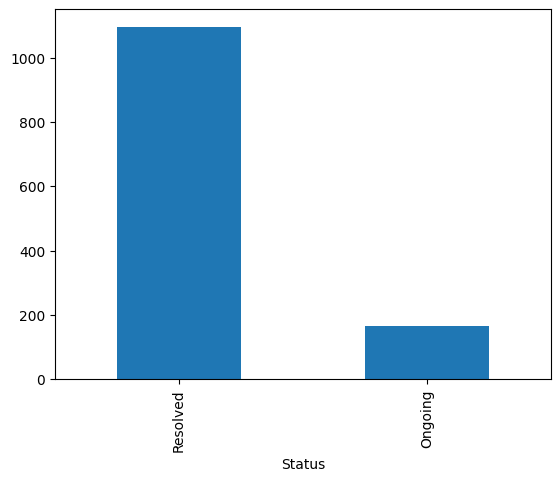

In [23]:
#Para a 1° visualização vamos ter o status dos casos:
casos_status = df_tabelaviolencia['Status'].value_counts()
casos_status.plot(kind='bar')
#Podemos observar que a maioria dos casos foram resolvidos, a taxa de casos em andamento é muito baixa.

C:\Users\tayna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


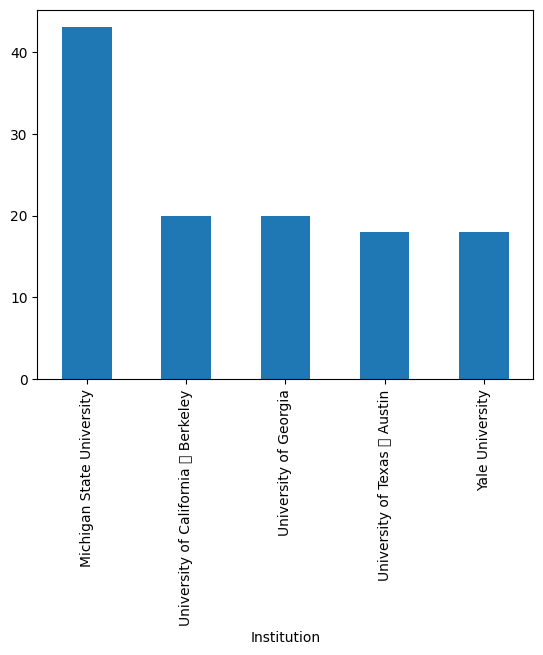

In [37]:
#2° visualização: Instituição que mais apresentou casos 
instituicao = df_rank_inst ['Institution'].value_counts()
instituicao.plot(kind='bar')

plt.show()

In [41]:
#3° visualização

df_tabelaviolencia['Updated'] = pd.to_datetime(df_tabelaviolencia['Updated'])

In [45]:
selecao = (df_tabelaviolencia['Updated'] >= '2019') & (df_tabelaviolencia['Updated'] <= '2020')

df_filtrado = df_tabelaviolencia[selecao]

df_filtrado

,Incident Number,Status,Updated,Person,Institution,Role,Position,Discipline,Specific Discipline,Outcome,Specific Outcome,Outcome Year,Original Link(s)
1,Incident 7205,Resolved,2019-06-07,Leon Howard,Alabama State University,Administrator,President,NaN,NaN,Criminal Plea / Conviction;Jury / Judge Findin...,Grand jury indictment on charges of attempted ...,1993.0,http://chronicle.com/article/Jury-Determines-E...
2,Incident 7206,Resolved,2019-06-07,LaVonette Bartley,Alabama State University,Administrator,Associate Executive Director in the office of ...,NaN,NaN,Jury / Judge Finding - Civil Case;Retired,Retired. jury award of over $1 million. (see J...,2010.0,https://web.archive.org/web/20120218172146/htt...
3,Incident 7207,Resolved,2019-06-07,John Knight,Alabama State University,Administrator,"Interim President, Special Assistant to the Pr...",NaN,NaN,Jury / Judge Finding - Civil Case,Jury award of over $1 million. (see LaVonette ...,2010.0,https://web.archive.org/web/20120218172146/htt...
4,Incident 7208,Resolved,2019-06-07,Philip Jemilohun,Albany State University,Faculty,Associate Professor,"Physical Sciences and Mathematics, Bioscience",Bioscience,Resigned,"Arrested/had prior convictions, outcome unknow...",2009.0,http://wfxl.com/news/local/albany-state-univer...
5,Incident 7209,Resolved,2019-06-07,Brian Richmond,American Museum of Natural History,Faculty,Curator,"Social and Behavioral Sciences, Anthropology, ...",Anthropology Paleoanthropology,Official Warning / Reprimand;Resigned,Found to have violated policy related to super...,2016.0,http://www.sciencemag.org/news/2016/02/sexual-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,Incident 8508,Ongoing,2019-12-06,NaN,Southern Connecticut State University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://fox61.com/2019/05/02/scsu-administrato...
989,Incident 8510,Ongoing,2019-12-06,NaN,Bloomsburg University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.readingeagle.com/news/article/bloo...
990,Incident 8512,Resolved,2019-12-30,Matthew Ellis,University of Oklahoma,Faculty,Associate Professor,Arts and Humanities,Theatre,Resigned,"""violated OU's consensual sexual relationships...",2019.0,http://www.oudaily.com/news/it-cannot-be-full-...
991,Incident 8515,Resolved,2019-12-10,Nick Flor,University of New Mexico,Faculty,Professor,Business,business,Fine / Salary Reduction;Suspended / Leave / Re...,"""The report found him responsible for quid pro...",2019.0,https://reason.com/2019/12/10/university-of-ne...


In [52]:
df_tabelaviolencia['Ano'] = df_tabelaviolencia['Updated'].dt.year


In [54]:
total_ano = df_tabelaviolencia['Ano'].value_counts()
total_ano

Ano
2019    851
2021    136
2020    135
2022    105
2023     32
Name: count, dtype: int64

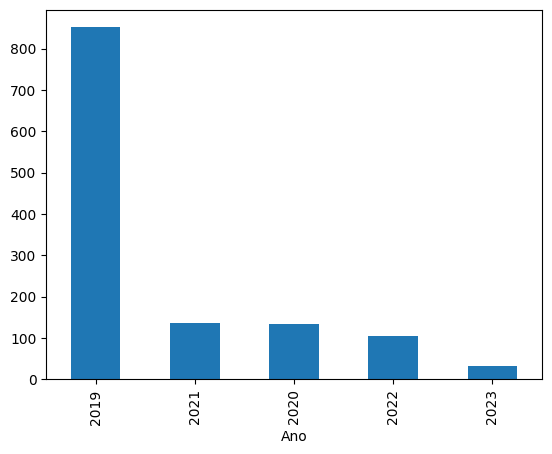

In [56]:
casos_ano = df_tabelaviolencia['Ano'].value_counts()
casos_ano.plot(kind='bar')

plt.show()